# KMeans Clustering Implementation & Analysis

In this notebook, we'll use the scaled, non-outlier data from `engineering.ipynb` to implement a KMeans clustering algorithm. 

## Table of Contents
1. [Setup](#setup)
2. [Find Optimal K](#find-optimal-k)
3. [KMeans](#kmeans)

## Setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scripts.useful_functions import load_analysis_data

In [11]:
#Load scaled data
scaled_df = load_analysis_data("scaled_tbc_no_out.csv")

scaled_df

Error: [Errno 2] No such file or directory: '../data/analysisscaled_tbc_no_out.csv'


UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

## Find Optimal K

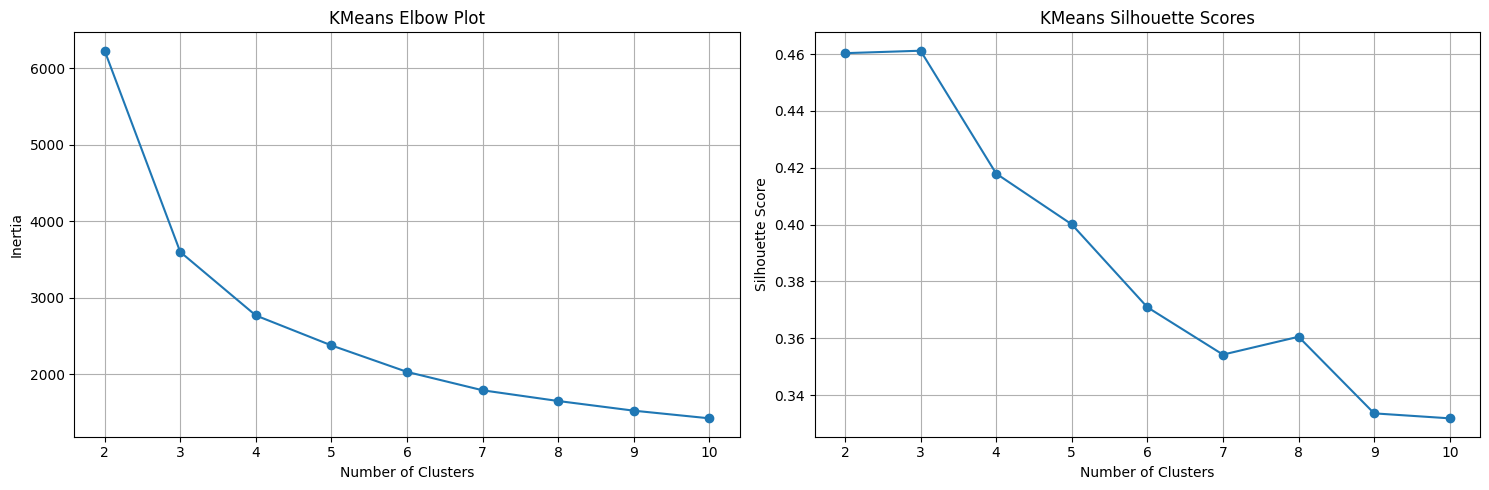

In [9]:
max_k = 10

inertia = []
silhouette = []

k_vals = range(2, max_k + 1)

for k in k_vals:
    
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=1000)
    
    cluster_labs = kmeans.fit_predict(scaled_df)
    
    s_score = silhouette_score(scaled_df, cluster_labs)
    
    silhouette.append(s_score)
    inertia.append(kmeans.inertia_)
    

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(k_vals, inertia, marker='o')
plt.title("KMeans Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_vals)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_vals, silhouette, marker='o')
plt.title("KMeans Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(k_vals)
plt.grid(True)

plt.tight_layout()
plt.show()

Looks like either 3 or 4 clusters could work. k = 3 had a higher silhouette score, meaning there was less overlap between clusters so I'll use k=3 for the rest of this notebook.

## KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=1, max_iter=1000)
cluster_labs = kmeans.fit_predict(scaled_df)

cluster_labs

array([0, 1, 2, ..., 2, 1, 0], dtype=int32)

In [13]:
#Load non-outliers df
non_outliers_df = load_data_path("tbc_no_outliers.csv")

non_outliers_df["Clusters"] = cluster_labs
non_outliers_df.head(5)

,CustomerID,LTDValue,PurchaseFrequency,MostRecentPurchase,PurchaseRecencyDays,Clusters
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,0
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,1
4,12350.0,294.40,1,2011-02-02 16:01:00,309,2
5,12352.0,2226.04,8,2011-11-03 14:37:00,35,0
6,12353.0,89.00,1,2011-05-19 17:47:00,203,2


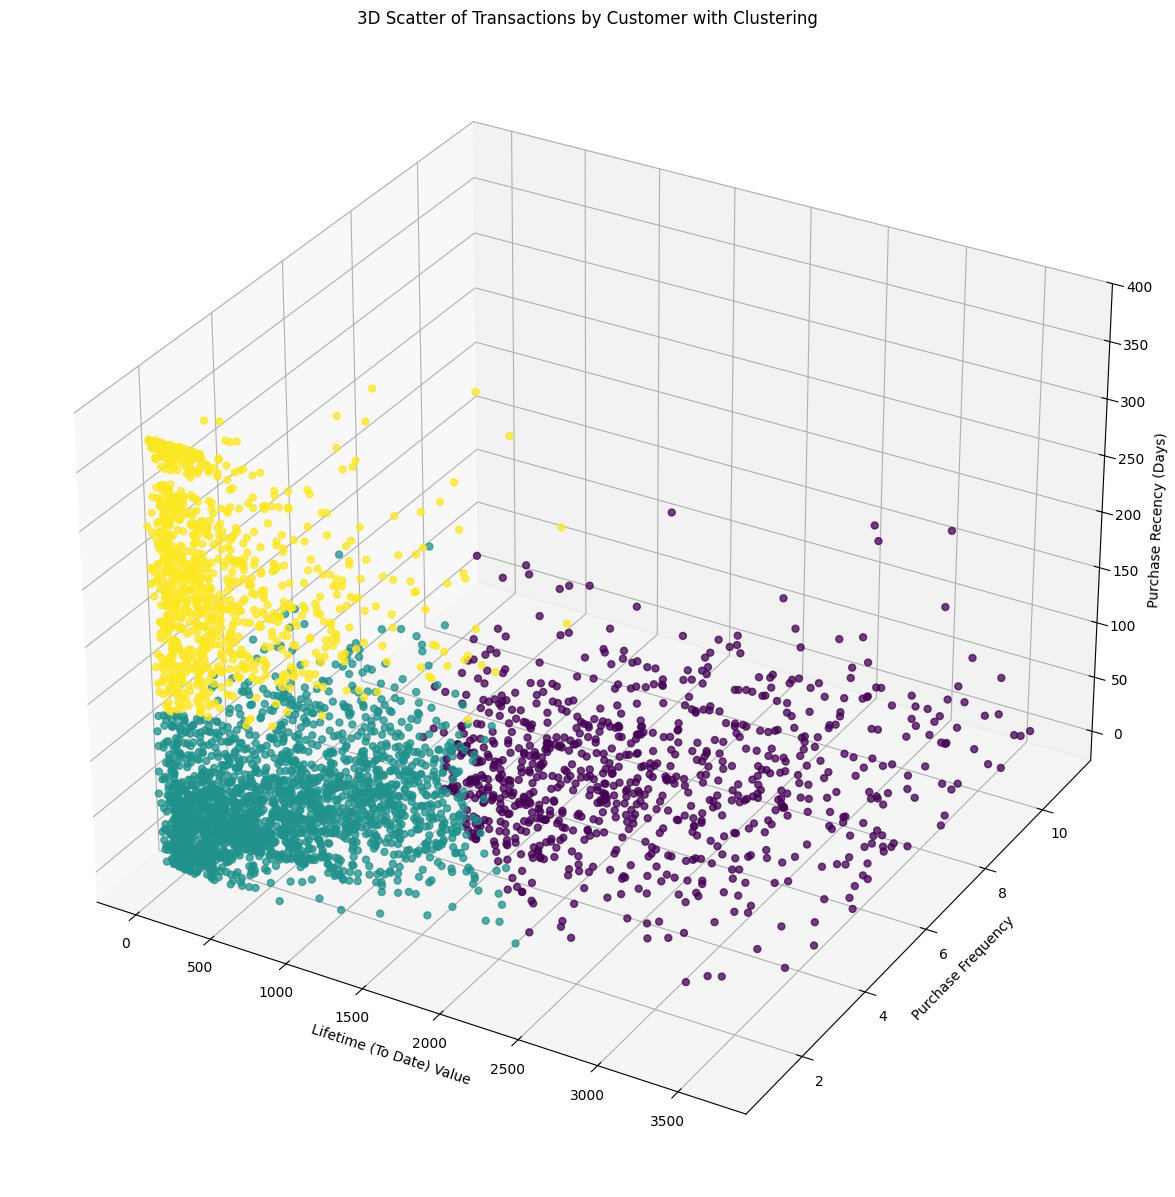

In [23]:
#Plot clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["LTDValue"],
                     non_outliers_df["PurchaseFrequency"],
                     non_outliers_df["PurchaseRecencyDays"],
                     c=non_outliers_df["Clusters"],
                     marker='o', 
                     alpha=0.75,
                     s=25)

ax.set_xlabel("Lifetime (To Date) Value")
ax.set_ylabel("Purchase Frequency")
ax.set_zlabel("Purchase Recency (Days)")

ax.set_title("3D Scatter of Transactions by Customer with Clustering")

plt.show()
